# Stock_Analytica
This script imports data from the master data list CSV and analyzes it for significant information.

Project Script PFD:

1. Stock_Query.ipynb
2. Stock_Analytica.ipynb

In [ ]:
'''
implementation notes:
1. consider plt.xticks(rotation=45)
2. replace tickers with company names
3. plt.savefig() for each fig
4. create standard function for plotting
5. delete procject 1 data vis file
'''

Importing Major Datasets & Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
master_ds = '../Resources/Master_Datasets/master_dataset_1577635349.csv'
meta_ds = '../Resources/S&P500_List.csv'

meta_raw = pd.read_csv(meta_ds, encoding='ISO 8859-1')
master_raw = pd.read_csv(master_ds)

In [3]:
meta_raw

,ticker,security,sec_filings,gics_sector,gics_sub_industry,hq_location,date_first_added,cik,founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",3/31/1964,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",12/31/2012,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",5/31/2018,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",7/6/2011,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,reports,Industrials,Industrial Machinery,"White Plains, New York",11/1/2011,1524472,NaN
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",10/6/1997,1041061,NaN
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",8/7/2001,1136869,NaN
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",6/22/2001,109380,NaN


In [4]:
# cleaning master_df to include only tickers that have existed for entire 20 years

keep_list = master_raw.groupby('Ticker').count()
keep_list = list(keep_list.loc[keep_list['Date'] >= 5000].index)

master_clean = master_raw.loc[master_raw['Ticker'].isin(keep_list)]

# merging meta data onto master for ease of analysis later on
master_df = master_clean.\
    rename(columns={'Ticker':'ticker'}).\
    merge(meta_raw[['ticker', 'gics_sector', 'gics_sub_industry']], on='ticker', how='left')

master_df

,Date,Open,High,Low,Close,Volume,ticker,gics_sector,gics_sub_industry
0,2019-12-27,176.65,177.54,175.6200,177.26,1472800,MMM,Industrials,Industrial Conglomerates
1,2019-12-26,176.45,176.66,175.5000,176.59,1435217,MMM,Industrials,Industrial Conglomerates
2,2019-12-24,178.27,178.67,176.0419,176.68,1259530,MMM,Industrials,Industrial Conglomerates
3,2019-12-23,176.71,179.18,176.5600,178.47,4876175,MMM,Industrials,Industrial Conglomerates
4,2019-12-20,174.79,175.47,172.2000,175.37,7506148,MMM,Industrials,Industrial Conglomerates
...,...,...,...,...,...,...,...,...,...
1887717,1999-12-31,58.75,59.75,58.3800,59.19,158100,ZION,Financials,Regional Banks
1887718,1999-12-30,59.66,59.69,58.3800,58.63,793200,ZION,Financials,Regional Banks
1887719,1999-12-29,59.75,59.88,58.7500,59.41,481400,ZION,Financials,Regional Banks
1887720,1999-12-28,59.69,60.38,58.9400,59.31,899500,ZION,Financials,Regional Banks


Reviewing Meta Data in Dataset (Sectors & Industries Present)

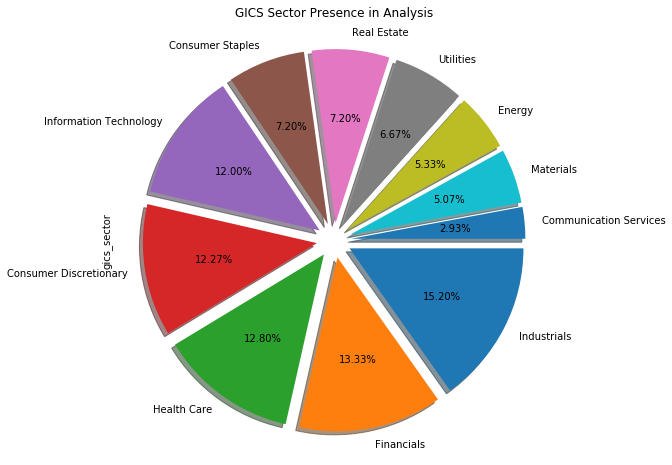

In [5]:
# reviewing GICS Sectors present in dataset

sectors = master_df[['gics_sector' ,'ticker']].\
    groupby('ticker').max()['gics_sector'].\
    value_counts()

sectors.plot(
    kind='pie',
    figsize=(8,8),
    shadow=True,
    title='GICS Sector Presence in Analysis',
    counterclock=False,
    autopct='%.2f%%',
    explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
)


Amount of Unique Sub Industries: 115

                                    Volume  percent
gics_sub_industry                                  
Health Care Equipment                   15     4.00
Electric Utilities                      12     3.20
Multi-Utilities                         11     2.93
Industrial Machinery                    11     2.93
Semiconductors                          11     2.93
Regional Banks                           9     2.40
Aerospace & Defense                      9     2.40
Oil & Gas Exploration & Production       9     2.40
Packaged Foods & Meats                   9     2.40
Application Software                     9     2.40
Asset Management & Custody Banks         8     2.13
Property & Casualty Insurance            8     2.13
Pharmaceuticals                          7     1.87
Biotechnology                            7     1.87
Residential REITs                        6     1.60


Text(0.5, 0, 'Percent')

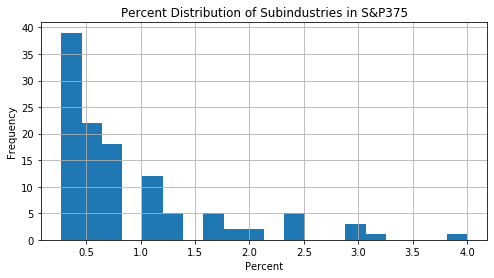

In [6]:
# reviewing GICS Sub Industries present in dataset
print(
f'''
Amount of Unique Sub Industries: {len(master_df['gics_sub_industry'].unique())}
'''
)

# creating subindustries dataframe to plot
subind = master_df[['gics_sub_industry' ,'ticker', 'Volume']].\
    groupby('ticker').max().\
    groupby('gics_sub_industry').count()

subind['percent'] = round((subind['Volume']/sum(subind['Volume']))*100, 2)


print(subind.sort_values('percent', ascending=False).head(15))


# plotting percent distribution of subindustries (too many subindustries to plot on a pie/bar chart)
ax = subind['percent'].plot(
    kind='hist',
    bins=20,
    title='Percent Distribution of Subindustries in S&P375',
    figsize=(8,4),
    grid=True
)
ax.set_xlabel("Percent")


Text(0, 0.5, 'Price (USD)')

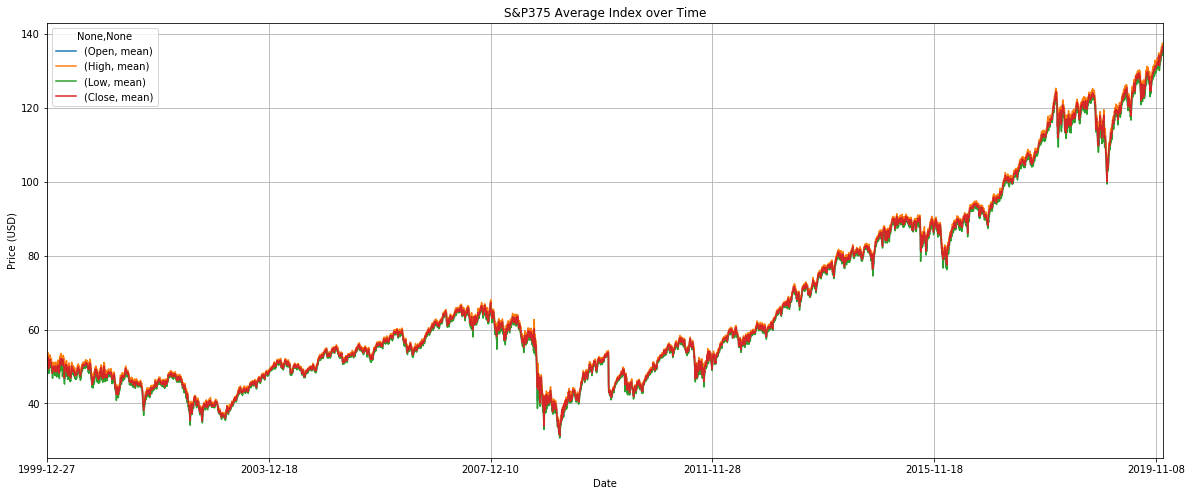

In [285]:
# Creating s&p500 average index
snp375_agg = master_df.groupby('Date').agg({
    'Open' : 'mean',
    'High' : 'mean',
    'Low' : 'mean',
    'Close' : 'mean',
    'Volume' : ['mean', 'var']
})

# viewing average stock values over time
ax11 = snp375_agg[['Open', 'High', 'Low', 'Close']].plot(
    title='S&P375 Average Index over Time',
    grid=True,
    figsize=(20,8)
)

ax11.set_ylabel('Price (USD)')

Text(0, 0.5, 'Volume (10^7)')

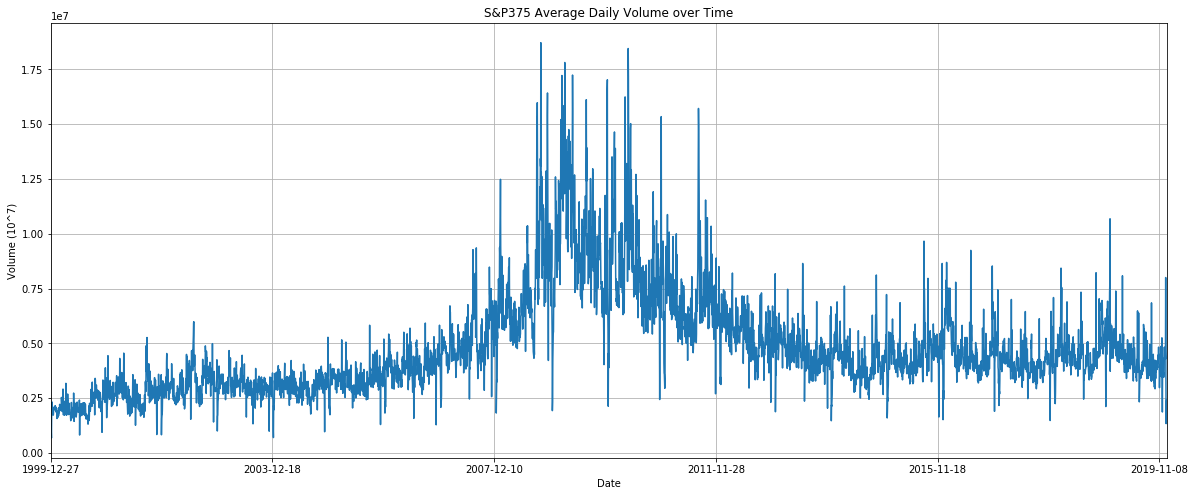

In [284]:
# view average volume movement over time
ax10 = snp375_agg['Volume']['mean'].plot(
    title='S&P375 Average Daily Volume over Time',
    grid=True,
    figsize=(20,8)
)

ax10.set_ylabel('Volume (10^7)')

Text(0, 0.5, 'Volume Variance (10^16)')

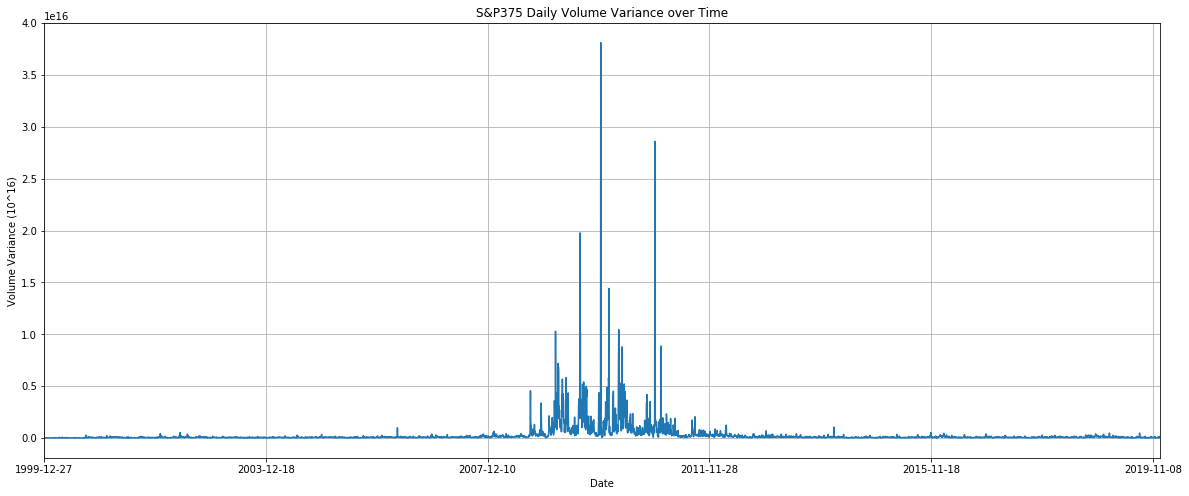

In [283]:
# view avergae volume variance over time
ax9 = snp375_agg['Volume']['var'].plot(
    title='S&P375 Daily Volume Variance over Time',
    grid=True,
    figsize=(20,8)
)

ax9.set_ylabel('Volume Variance (10^16)')

Reviewing Top and Bottom Daily Performing Stocks

In [10]:
# adding percent gain row to master_df
master_df['percent_gain'] = ((master_df['Close'] - master_df['Open']) / master_df['Open']) * 100

# calculating ticker averages over 20 year period
ticker_avg_df = master_df.groupby('ticker').agg({
    'Open' : 'mean',
    'High' : 'mean',
    'Low' : 'mean',
    'Close' : 'mean',
    'Volume' : 'mean',
    'percent_gain' : 'mean',
    'gics_sector' : 'max',
    'gics_sub_industry' : 'max'
})

# printing top 10 average daily gaining stocks
print(f'''
    Top 10 Average Daily Gain Stocks:
    
    {ticker_avg_df.sort_values('percent_gain', ascending=False)
      [['percent_gain', 'gics_sector', 'gics_sub_industry']].head(10)}
     ''')

# printing bottom 10 average daily gaining stocks
print(f'''
    Bottom 10 Average Daily Gain Stocks:
    
    {ticker_avg_df.sort_values('percent_gain', ascending=True)
      [['percent_gain', 'gics_sector', 'gics_sub_industry']].head(10)}
     ''')



    Top 10 Average Daily Gain Stocks:
    
            percent_gain             gics_sector               gics_sub_industry
ticker                                                                      
NVR         0.157812  Consumer Discretionary                    Homebuilding
IDXX        0.131890             Health Care           Health Care Equipment
IT          0.128900  Information Technology  IT Consulting & Other Services
ANSS        0.128888  Information Technology            Application Software
ADSK        0.121355  Information Technology            Application Software
MNST        0.119444        Consumer Staples                     Soft Drinks
RMD         0.108109             Health Care           Health Care Equipment
VTR         0.100621             Real Estate               Health Care REITs
SNPS        0.098843  Information Technology            Application Software
CDNS        0.098463  Information Technology            Application Software
     

    Bottom 10 Average

Reviewing Sector Performance

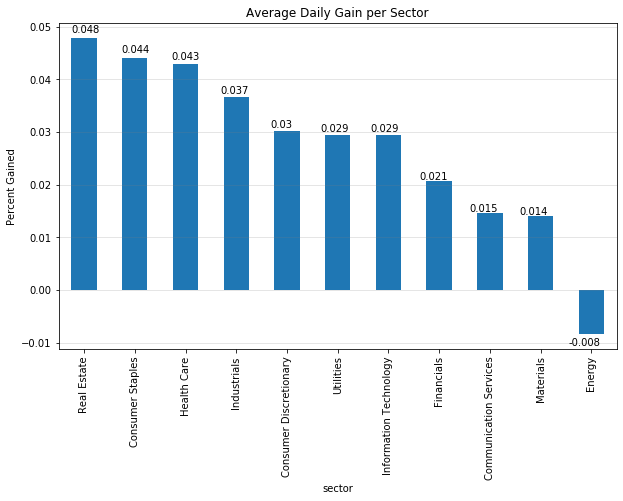

In [281]:
# comparing average industry performance over 20 years
ax1 = ticker_avg_df.groupby('gics_sector').mean().\
    sort_values('percent_gain', ascending=False)['percent_gain'].\
    plot(
        kind='bar',
#         yerr=list(map(lambda x: sqrt(x), ticker_avg_df.groupby('gics_sector').var().\
#              sort_values('percent_gain', ascending=False)['percent_gain'])),
        title='Average Daily Gain per Sector',
        figsize=(10,6)
    )

ax1.set_xlabel('sector')
ax1.set_ylabel('Percent Gained')
ax1.grid(axis='y', linewidth=1, color='grey', which='both', alpha=0.2)

#including value annontations on chart
for p in ax1.patches:
    height = round(p.get_height(), 3)
    x_loc = p.get_x() * 0.980
    if height >= 0:
        y_loc = p.get_height() * 1.02
    else:
        y_loc = p.get_height() * 1.25
    ax1.annotate(str(height), (x_loc, y_loc))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C33646F898>,
      dtype=object)

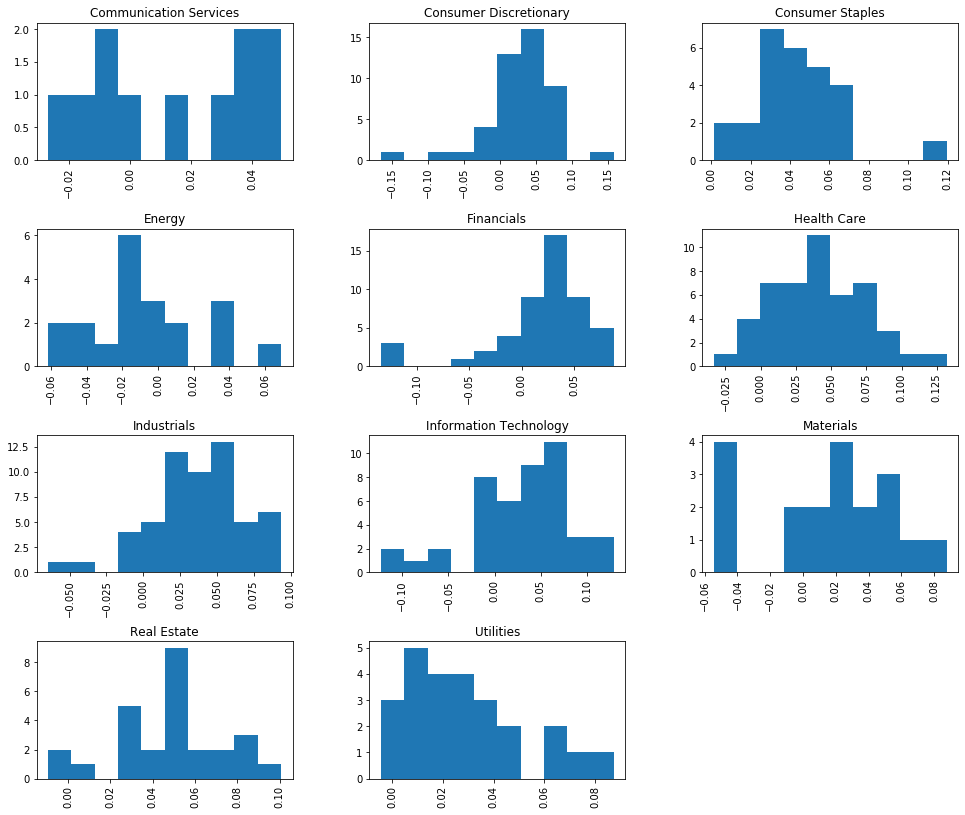

In [12]:
# highlighting a quick distribution analysis of each sector
ticker_avg_df['percent_gain'].hist(
    by=ticker_avg_df['gics_sector'],
    figsize=(16,14)
)

In [35]:
# calculating S&P375 percent gains and outputting index average
snp375_agg['percent_gain'] = ((snp375_agg['Close']['mean'] - snp375_agg['Open']['mean']) / snp375_agg['Open']['mean']) * 100

print(
f'''
The S&P375 has had an average gain of {round(snp375_agg['percent_gain'].mean(), 4)}% Daily.
This is also {round(snp375_agg['percent_gain'].mean(), 4) * 365}% Annually.
'''
)


The S&P375 has had an average gain of 0.0231% Daily.
This is also 8.4315% Annually.



In [72]:
# getting list of dates that beat the average gain by 100x (~2.31%) (5034 in all 20 years, 65 returned)
top_gain_days = list(snp375_agg.loc[snp375_agg['percent_gain'] >= 100 * round(snp375_agg['percent_gain'].mean(), 4)].index)

# getting list of dates that beat the average gain by 100x (~2.31%) (5034 in all 20 years, 63 returned)
bottom_gain_days = list(snp375_agg.loc[snp375_agg['percent_gain'] <= -100 * round(snp375_agg['percent_gain'].mean(), 4)].index)

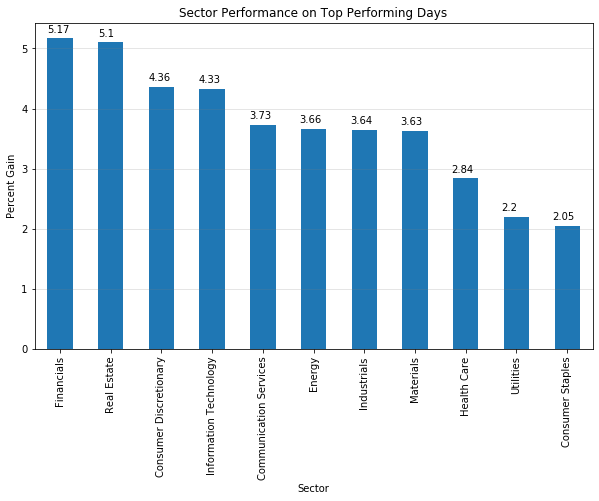

In [277]:
# plotting best sectors based on top gaining days
best_daily_sectors = master_df.loc[master_df['Date'].isin(top_gain_days)].\
                    groupby('gics_sector').\
                    mean().\
                    sort_values('percent_gain', ascending=False)

ax8 = best_daily_sectors['percent_gain'].plot(
    kind='bar',
    title='Sector Performance on Top Performing Days',
    figsize=(10,6)
)

ax8.set_xlabel('Sector')
ax8.set_ylabel('Percent Gain')
ax8.grid(axis='y', linewidth=1, color='grey', which='both', alpha=0.2)

#including value annontations on chart
for p in ax8.patches:
    height = round(p.get_height(), 2)
    x_loc = p.get_x() * 0.995
    if height >= 0:
        y_loc = p.get_height() + 0.1
    else:
        y_loc = p.get_height() - 0.2
    ax8.annotate(str(height), (x_loc, y_loc))

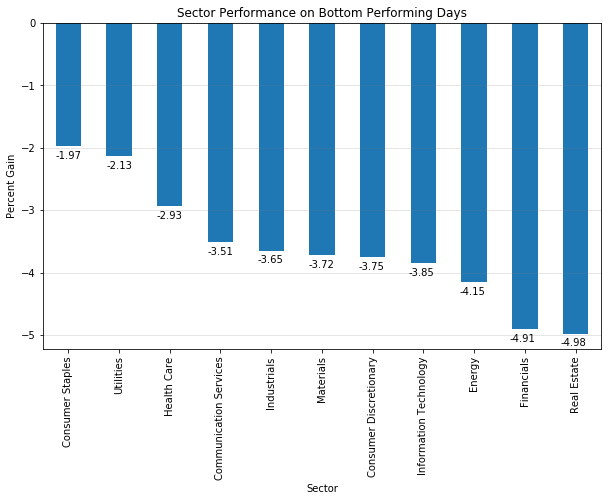

In [274]:
# plotting worst sectors based on bottom gaining days
worst_daily_sectors = master_df.loc[master_df['Date'].isin(bottom_gain_days)].\
                    groupby('gics_sector').\
                    mean().\
                    sort_values('percent_gain', ascending=False)

ax7 = worst_daily_sectors['percent_gain'].plot(
    kind='bar',
    title='Sector Performance on Bottom Performing Days',
    figsize=(10,6)
)

ax7.set_xlabel('Sector')
ax7.set_ylabel('Percent Gain')
ax7.grid(axis='y', linewidth=1, color='grey', which='both', alpha=0.2)

#including value annontations on chart
for p in ax7.patches:
    height = round(p.get_height(), 2)
    x_loc = p.get_x() * 0.995
    if height >= 0:
        y_loc = p.get_height() + 0.75
    else:
        y_loc = p.get_height() - 0.2
    ax7.annotate(str(height), (x_loc, y_loc))

# Determining what to invest in when a crash is expected
The time frame for this analysis is based around the 2018 EOY Market Dip.

In [112]:
#finding dates of recent drop (EOY 2018; sept 2019 - Jan 2019)
eoy_2018_df = snp375_agg.\
    loc[(snp375_agg.index >= '2018-09-01') & (snp375_agg.index <= '2019-01-01')].\
    sort_values(('Open', 'mean'))

crash1_start_date = eoy_2018_df.iloc[-1].name
crash1_end_date = eoy_2018_df.iloc[0].name

print(
f'''
The End-Of-Year Crash in 2018 occured between {crash1_start_date} - {crash1_end_date} according to S&P375 "Open" Value data.
''')


The End-Of-Year Crash in 2018 occured between 2018-09-21 - 2018-12-26 according to S&P375 "Open" Value data.



In [144]:
# determining what stocks and sectors performed the worst during the EOY 2018 Crash (based on S&P375 peak-to-peak)

# creating start & end dataframes for 2018 EOY
crashstart_2018_df = master_df.loc[master_df['Date'] == crash1_start_date]
crashend_2018_df = master_df.loc[master_df['Date'] == crash1_end_date]

# merging start & end values on ticker
crash_2018_df = crashstart_2018_df.merge(crashend_2018_df, on='ticker', suffixes=('_start', '_end'))

# adding peak to peak gain percent over crash period
crash_2018_df['p2p_gain'] = ((crash_2018_df['Open_end'] - crash_2018_df['Open_start']) / crash_2018_df['Open_start']) * 100

print(
f'''
The average percent gain during the peak-to-peak, end-of-year 2018 crash was {round(crash_2018_df['p2p_gain'].mean(), 2)}%.
''')


The average percent gain during the peak-to-peak, end-of-year 2018 crash was -19.41%.



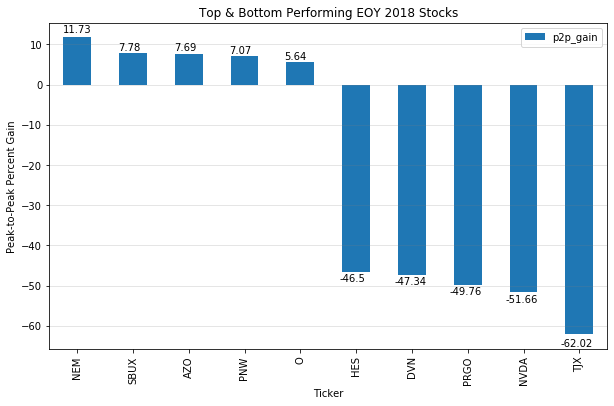

In [202]:
# determinging the top performing stocks during EOY 2018 Crash
worst_2018_stocks = list(crash_2018_df.sort_values('p2p_gain').iloc[0:5]['ticker'])
best_2018_stocks = list(crash_2018_df.sort_values('p2p_gain').iloc[-5:]['ticker'])

top_bot_2018_stocks = worst_2018_stocks + best_2018_stocks

top_bot_2018_plot = crash_2018_df.loc[crash_2018_df['ticker'].isin(top_bot_2018_stocks)].\
                        sort_values('p2p_gain', ascending=False).reset_index()

# plotting stocks
ax3 = top_bot_2018_plot.plot(
    kind='bar',
    x='ticker',
    y='p2p_gain',
    title='Top & Bottom Performing EOY 2018 Stocks',
    figsize=(10,6)
)

ax3.set_xlabel('Ticker')
ax3.set_ylabel('Peak-to-Peak Percent Gain')
ax3.grid(axis='y', linewidth=1, color='grey', which='both', alpha=0.2)

#including value annontations on chart
for p in ax3.patches:
    height = round(p.get_height(), 2)
    x_loc = p.get_x() * 0.99
    if height >= 0:
        y_loc = p.get_height() * 1.1
    else:
        y_loc = p.get_height() * 1.05
    ax3.annotate(str(height), (x_loc, y_loc))

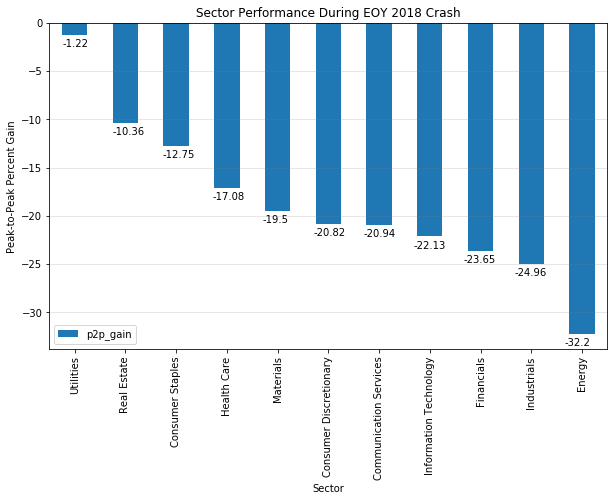

In [229]:
# determinging the top performing sectors during EOY 2018 Crash
crash_2018_sectors = crash_2018_df.rename(columns={'gics_sector_start':'gics_sector'}).\
    groupby('gics_sector').agg({
        'p2p_gain' : 'mean'
    }).sort_values('p2p_gain', ascending=False)

crash_2018_sectors

# plotting sectors
ax4 = crash_2018_sectors.plot(
    kind='bar',
    title='Sector Performance During EOY 2018 Crash',
    figsize=(10,6)
)

ax4.set_xlabel('Sector')
ax4.set_ylabel('Peak-to-Peak Percent Gain')
ax4.grid(axis='y', linewidth=1, color='grey', which='both', alpha=0.2)

#including value annontations on chart
for p in ax4.patches:
    height = round(p.get_height(), 2)
    x_loc = p.get_x() * 0.99
    if height >= 0:
        y_loc = p.get_height() + 1
    else:
        y_loc = p.get_height() - 1.25
    ax4.annotate(str(height), (x_loc, y_loc))

# Determining what to invest in on a crash rebound
The time frame during this period is from 2018-12-26 to date (2019-12-27) since the market has rallied since the end of the 2018 crash.

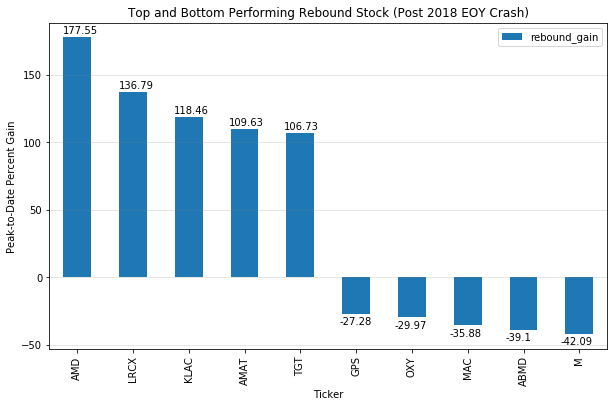

In [256]:
# creating end date (final peak) dataset for each stock
end_date = master_df['Date'].max()
end_stock_df = master_df.loc[master_df['Date'] == end_date]

# merging crash-end and final peak datasets for rebound analysis
rebound_2018_df = crashend_2018_df.merge(end_stock_df, on='ticker', suffixes=('_start', '_end')).\
    rename(columns={'gics_sector_start':'gics_sector'})

# creating "rebound_gain" data, identifying top and bottom 5 stocks, and merging for plotting
rebound_2018_df['rebound_gain'] = ((rebound_2018_df['Open_end'] - rebound_2018_df['Open_start']) / rebound_2018_df['Open_start']) * 100

top_reb_stocks = list(rebound_2018_df.sort_values('rebound_gain')[-5:]['ticker'])
bot_reb_stocks = list(rebound_2018_df.sort_values('rebound_gain')[:5]['ticker'])

top_bot_reb_stocks = top_reb_stocks + bot_reb_stocks

rebound_2018_stocks_plot = rebound_2018_df.loc[rebound_2018_df['ticker'].isin(top_bot_reb_stocks)].\
    sort_values('rebound_gain', ascending=False)

# plotting top and bottom rebound stocks after 2018 EOY crash
ax5 = rebound_2018_stocks_plot.plot(
    kind='bar',
    x='ticker',
    y='rebound_gain',
    title='Top and Bottom Performing Rebound Stock (Post 2018 EOY Crash)',
    figsize=(10,6)
)

ax5.set_xlabel('Ticker')
ax5.set_ylabel('Peak-to-Date Percent Gain')
ax5.grid(axis='y', linewidth=1, color='grey', which='both', alpha=0.2)

#including value annontations on chart
for p in ax5.patches:
    height = round(p.get_height(), 2)
    x_loc = p.get_x() * 0.99
    if height >= 0:
        y_loc = p.get_height() + 3
    else:
        y_loc = p.get_height() - 8
    ax5.annotate(str(height), (x_loc, y_loc))

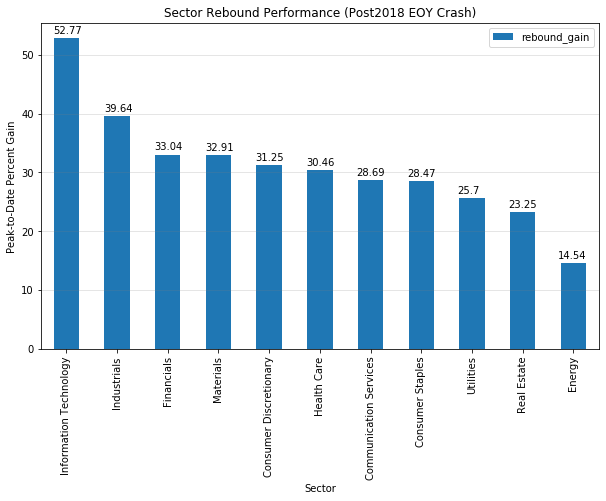

In [269]:
# determinging the top performing sectors after EOY 2018 Crash
rebound_sectors = rebound_2018_df.groupby('gics_sector').agg({
    'rebound_gain' : 'mean'
    }).sort_values('rebound_gain', ascending=False)

# plotting sector rebound
ax6 = rebound_sectors.plot(
    kind='bar',
    title='Sector Rebound Performance (Post2018 EOY Crash)',
    figsize=(10,6),
)

ax6.set_xlabel('Sector')
ax6.set_ylabel('Peak-to-Date Percent Gain')
ax6.grid(axis='y', linewidth=1, color='grey', which='both', alpha=0.2)

#including value annontations on chart
for p in ax6.patches:
    height = round(p.get_height(), 2)
    x_loc = p.get_x() * 0.995
    if height >= 0:
        y_loc = p.get_height() + 0.75
    else:
        y_loc = p.get_height() - 8
    ax6.annotate(str(height), (x_loc, y_loc))